# Gradient Boosting step by step

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05* np.random.rand(100)

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = X.reshape(100)
df['y'] = y

In [8]:
df.head()

,X,y
0,-0.125460,0.048792
1,0.450714,0.641251
2,0.231994,0.177181
3,0.098658,0.054629
4,-0.343981,0.400348


Text(0.5, 1.0, 'X vs y')

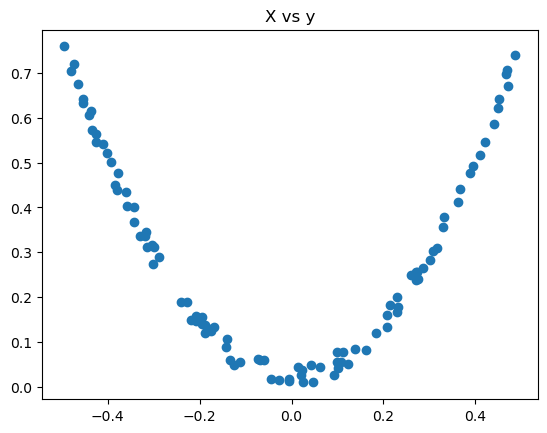

In [9]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

### Model 1

In [10]:
df['pred1'] = df['y'].mean()

In [11]:
df['res1'] = df['y'] - df['pred1']

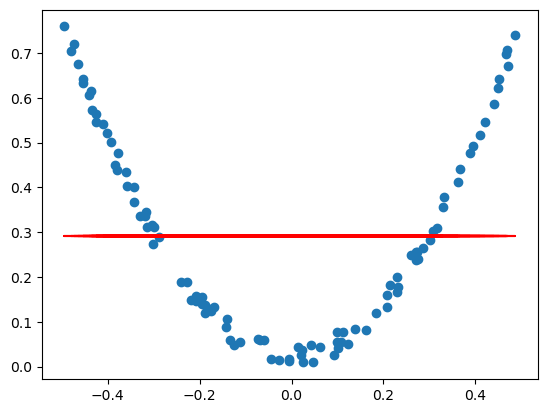

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'], color='red')

### Model 2

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes = 8)

In [14]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.352\nsquared_error = 0.05\nsamples = 100\nvalue = -0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.436\nsquared_error = 0.01\nsamples = 19\nvalue = 0.278'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.003\nsamples = 8\nvalue = 0.379'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.003\nsamples = 11\nvalue = 0.205'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.037\nsamples = 81\nvalue = -0.065'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.264\nsquared_error = 0.012\nsamples = 66\nvalue = -0.14'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.001\nsamples = 10\nvalue = 0.038'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.007\nsamples = 56\nvalue = -0.171'),
 Text(0.454545454545454

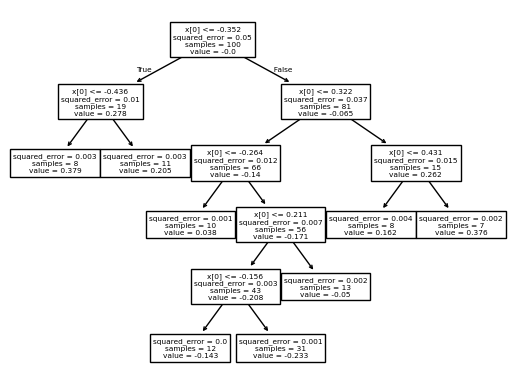

In [15]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [16]:
X_test = np.linspace(-0.5,0.5, 500)

In [17]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

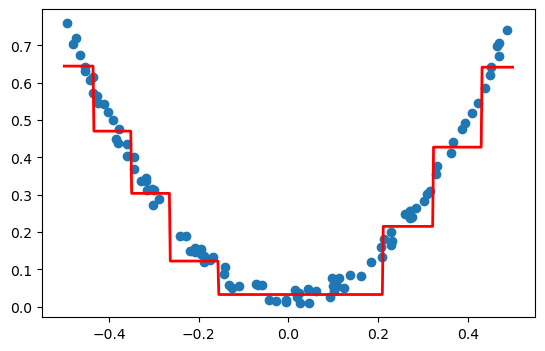

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])

In [20]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [21]:
df['res2'] = df['y'] - df['pred2']

In [22]:
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.048792,0.290404,-0.241612,0.032563,0.016229
1,0.450714,0.641251,0.290404,0.350847,0.641498,-0.000247
2,0.231994,0.177181,0.290404,-0.113223,0.215085,-0.037903
3,0.098658,0.054629,0.290404,-0.235775,0.032563,0.022066
4,-0.343981,0.400348,0.290404,0.109944,0.303532,0.096816


### Model 3

In [23]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

Text(0.5, 1.0, 'X vs y')

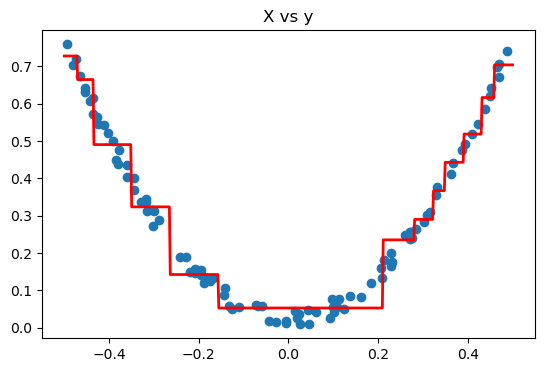

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [27]:
def gradient_boost(X,y, number, lr, count=1, regs=[], foo = None):
    if number == 0:
        return

    else:
        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo = y

        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X,y)
        regs.append(tree_reg)
        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr*regressor.predict(x1.reshape(-1,1)) for regressor in regs)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:,0], foo, 'r.')

        gradient_boost(X,y, number-1, lr, count+1, regs, foo=foo)


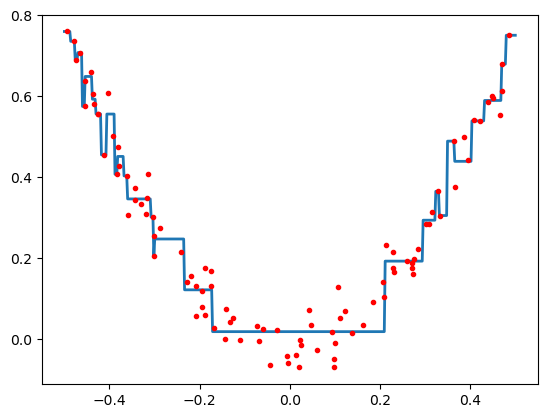

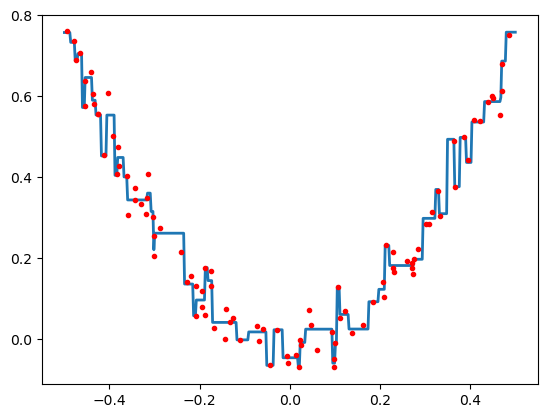

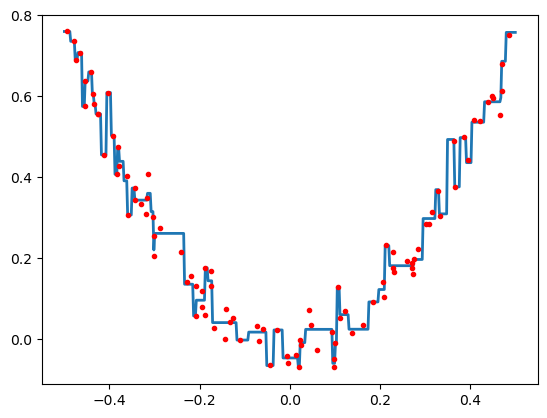

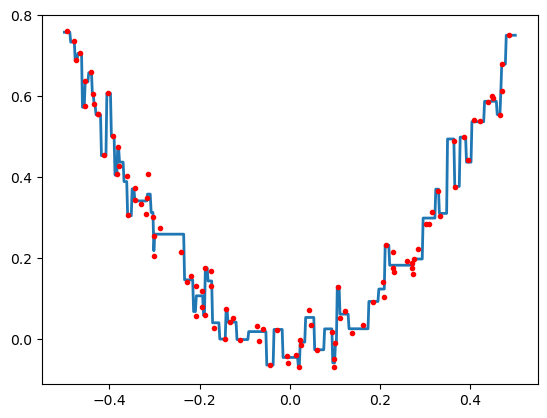

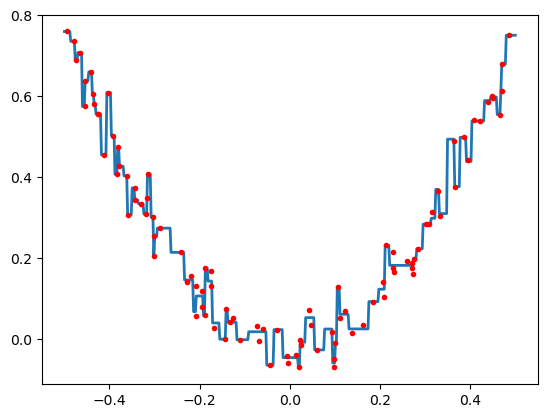

In [29]:
np.random.seed(42)
X = np.random.rand(100, 1) -0.5
y = 3*X[:,0]**2 + 0.05*np.random.randn(100)
gradient_boost(X,y, 5, lr=1)